In [ ]:
import pandas as pd
from google.colab import drive #memanggil package import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/CSV/regresi6b.spreadsheet - Sheet1.csv'


df = pd.read_csv(path)

df.describe()

,volume,omzet
count,24.000000,2.400000e+01
mean,13.000000,2.728542e+06
std,10.986157,3.105197e+06
min,2.000000,1.200000e+05
25%,3.000000,4.312500e+05
50%,7.000000,7.500000e+05
75%,22.250000,4.750000e+06
max,35.000000,9.450000e+06


In [ ]:
df

,lokasi,jenis,volume,satuan,omzet
0,Penangkar Bibit Ragunan,Pohon sukun,3,Pohon,750000
1,Penangkar Bibit Ragunan,Menteng,3,Pohon,450000
2,Penangkar Bibit Ragunan,Cermai,5,Pohon,375000
3,Penangkar Bibit Ragunan,Durian Montong,35,Pohon,8750000
4,Penangkar Bibit Ragunan,Jeruk Kip,18,Pohon,4500000
5,Penangkar Bibit Ragunan,Jeruk purut,23,Pohon,3450000
6,Penangkar Bibit Ragunan,Jeruk Bali,18,Pohon,3600000
7,Penangkar Bibit Ragunan,Mangga Manalagi,22,Pohon,5500000
8,Penangkar Bibit Ragunan,Belimbing Dewi,5,Pohon,750000
9,Penangkar Bibit Ragunan,jambu airlilin,27,Pohon,9450000


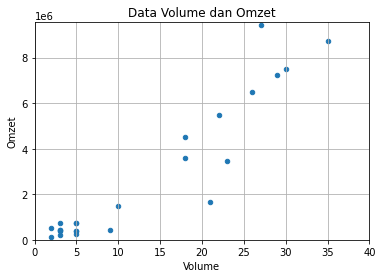

In [ ]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='volume', y='omzet')

plt.title('Data Volume dan Omzet')
plt.xlabel('Volume')
plt.ylabel('Omzet')
plt.xlim(0, 40)
plt.ylim(0, 9550000)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
x = np.array(df['volume'])
y = np.array(df['omzet'])

print(f'x : {x}')
print(f'y : {y}')

x : [ 3  3  5 35 18 23 18 22  5 27 26  5  2  3  3 29 10  2  3 30  9  5 21  5]
y : [ 750000  450000  375000 8750000 4500000 3450000 3600000 5500000  750000
 9450000 6500000  750000  500000  210000  450000 7250000 1500000  120000
  375000 7500000  450000  250000 1680000  375000]


In [ ]:
x = x.reshape(-1, 1)
x.shape

(24, 1)

In [ ]:
x

array([[ 3],
       [ 3],
       [ 5],
       [35],
       [18],
       [23],
       [18],
       [22],
       [ 5],
       [27],
       [26],
       [ 5],
       [ 2],
       [ 3],
       [ 3],
       [29],
       [10],
       [ 2],
       [ 3],
       [30],
       [ 9],
       [ 5],
       [21],
       [ 5]])

In [ ]:
#taraining model
from sklearn.linear_model import LinearRegression #memanggil model regresi linear

model = LinearRegression() #variabel model bisa diganti
model.fit(x, y) #x feature , y target


LinearRegression()

In [ ]:
x_vis = np.array([0, 370]).reshape(-1, 1) #pembuatan garis merah dari x
y_vis = model.predict(x_vis) #model mesin lerning

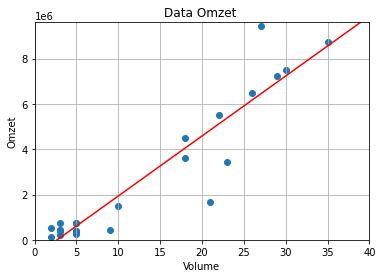

In [ ]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')
plt.title('Data Omzet ')
plt.xlabel('Volume')
plt.ylabel('Omzet')
plt.xlim(0, 40)
plt.ylim(0, 9600000) # untuk membuat batas pada visualisasi y
plt.grid(True)
plt.show()

In [ ]:
print(f'intercept  :  {model.intercept_}')
print(f'slope : {model.coef_}')

intercept  :  -714725.6243996159
slope : [264866.71469741]


In [ ]:
total_omzet = np.array([250000, 120000, 7250000, 7500000, 8750000]).reshape(-1, 1)
total_omzet

array([[ 250000],
       [ 120000],
       [7250000],
       [7500000],
       [8750000]])

In [ ]:
prediksi_indeks = model.predict(total_omzet)
prediksi_indeks

array([6.62159639e+10, 3.17832910e+10, 1.92028297e+12, 1.98649965e+12,
       2.31758304e+12])

In [ ]:
for omzet, index in zip(total_omzet, prediksi_indeks):
  print(f'Omzet : {omzet} prediksi indeks : {index}')

Omzet : [250000] prediksi indeks : 66215963948.72719
Omzet : [120000] prediksi indeks : 31783291038.064358
Omzet : [7250000] prediksi indeks : 1920282966830.5715
Omzet : [7500000] prediksi indeks : 1986499645504.923
Omzet : [8750000] prediksi indeks : 2317583038876.681
